# Example of error analysis using Ohm's Law

Ohm's law reads: $ V = IR $. Suppose you collected a bunch of measurements for voltage and current for a given resistor, and wanted to determine its resistance. The first thing would be to collect them into a CSV file [1], the `data.csv` file reproduced below.

In [ ]:
%load data.csv

V,I
3756.2,3.8
3692.8,3.7
3442.9,3.1
7441.6,6.4
5322.6,4.4
6100.5,5.1
2094.4,1.6
12626.6,10.0
8416.6,7.1
9412.8,8.4
10849.0,9.1
12503.4,11.0
10739.8,8.3
13619.2,11.4
3094.4,2.5
4097.6,4.0

**To try later:** 

`%load` is a *line magic* in the iPython notebook. It loads the contents of a file, in this case, `data.csv` into the cell.

If you wanted to replace this data with your own data and perform a modified analysis, you could do so and replace the `%load` line magic with the `%%writefile` cell magic (as `%%writefile data.csv`) to write the contents of the cell to the file `data.csv`.

For more about iPython magics, see the [documentation](http://ipython.readthedocs.org/en/stable/interactive/magics.html).

Our first step will be to visualize this data. We will start by importing the awesome `pandas` data analysis library for Python.

In [1]:
import pandas as pd

Let us now use pandas to import the data from the CSV file. We create an object '`df`' (which stands for DataFrame), which you can simply think of as a table. The column labels will be automatically read from the CSV file as $V$ and $I$.

In [2]:
df = pd.read_csv('data.csv', delimiter = '\s*,\s*', engine = 'python')
print df

          V     I
0    3756.2   3.8
1    3692.8   3.7
2    3442.9   3.1
3    7441.6   6.4
4    5322.6   4.4
5    6100.5   5.1
6    2094.4   1.6
7   12626.6  10.0
8    8416.6   7.1
9    9412.8   8.4
10  10849.0   9.1
11  12503.4  11.0
12  10739.8   8.3
13  13619.2  11.4
14   3094.4   2.5
15   4097.6   4.0


Now we will set up our notebook to display images inline. The second line of code is useful if you have a computer with a high-res display.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Next, we will import `pyplot` (a MATLAB-style plotting interface for Python), specify a nice style to use for our plot (`ggplot`), and create the plot, specifying our $x$ and $y$ values, followed by specifying axis labels (using $\LaTeX$ syntax). 

/Users/adarsh/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


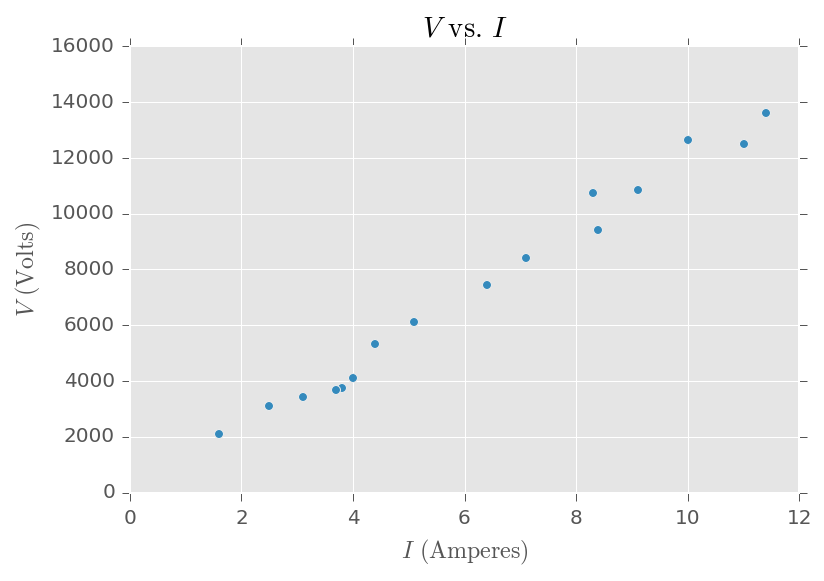

In [4]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plot = df.plot(x='I',y='V', kind='scatter', 
               title=r'$V$ $\rm vs.$ $I$')

plot.set_xlabel(r'$I$ $\rm (Amperes)$')
plot.set_ylabel(r'$V$ $\rm (Volts)$')

Now, let us run a linear regression analysis on our data to find the slope ($b$, which is just the resistance, $R$) and intercept ($a$) by minimizing $\chi^2$. 

Assume that all the voltage measurements have the same amount of error, $$\sigma_V = 0.1 V$$ (We will neglect the error in the current measurements for now).

In [5]:
sigma_V = 0.1

Then the intercept is given by:

$$a = \frac{1}{\Delta'}\left(\sum x_i^2\sum y_i-\sum x_i\sum x_iy_i\right)$$

and the slope by:


$$b = \frac{1}{\Delta'}\left(N\sum x_iy_i-\sum x_i\sum y_i\right)$$

where

$$\Delta' = N\sum x_i^2 - \left(\sum x_i\right)^2$$

you can find these formulae in Bevington and Robinson, page 105. 

Dataframes are easy to manipulate. If we wanted to create a column with the square of the current (corresponding to $x_i^2$ in the above expressions, and append it to the dataframe, we would just do the following: 

In [6]:
df['I^2'] = df['I']**2
print df

          V     I     I^2
0    3756.2   3.8   14.44
1    3692.8   3.7   13.69
2    3442.9   3.1    9.61
3    7441.6   6.4   40.96
4    5322.6   4.4   19.36
5    6100.5   5.1   26.01
6    2094.4   1.6    2.56
7   12626.6  10.0  100.00
8    8416.6   7.1   50.41
9    9412.8   8.4   70.56
10  10849.0   9.1   82.81
11  12503.4  11.0  121.00
12  10739.8   8.3   68.89
13  13619.2  11.4  129.96
14   3094.4   2.5    6.25
15   4097.6   4.0   16.00


Much better than Excel, right?! (At least, I think so...)

Similarly, we create a column for the product of voltage and current (corresponding to terms like $x_i y_i$ above).

In [7]:
df['IV'] = df['I']*df['V']

Now let us calculate the determinant, $\Delta'$

In [8]:
# N = number of data points
N = len(df.index)
# Calculate the determinant (Delta in your equations)
D = N*sum(df['I^2']) - sum(df['I'])**2

Finally, we can calculate the slope and intercept.

In [9]:
a = (1/D)*(sum(df['I^2'])*sum(df['V']) - sum(df['I'])*sum(df['IV']))
b = (1/D)*(N*sum(df['IV']) - sum(df['I'])*sum(df['V']))

# Print out the slope and intercept, formatted nicely
print('The slope is b = {:1.2f} Ohms'.format(b))
print('The intercept is a = {:1.2f} Volts'.format(a))

The slope is b = 1224.58 Ohms
The intercept is a = -320.29 Volts


Now let us calculate the error in the slope ($\sigma_b$) and intercept ($\sigma_a$). We will import the `numpy` module to help us with the calculations.

In [10]:
import numpy as np

For common uncertainties in $y_i$, the errors are given by:

$$\sigma_a^2 = \frac{\sigma_y^2}{\Delta'}\sum x_i^2$$

and 

$$\sigma_b^2 = N\frac{\sigma_y^2}{\Delta'}$$

In [11]:
sigma_a = np.sqrt((sigma_V**2/D)*sum(df['I^2']))
sigma_b = np.sqrt((sigma_V**2/D)*N)

print("The error in the intercept is sigma_a = {:1.2f} Volts".format(sigma_a))
print("The error in the slope (resistance) is sigma_b = {:1.2f} Ohms".format(sigma_b))

The error in the intercept is sigma_a = 0.06 Volts
The error in the slope (resistance) is sigma_b = 0.01 Ohms


So the resistance of this resistor is:

$$R = (1224.58\pm0.01) \Omega$$

Awesome! However, so far, we have neglected the errors in the x-values, that is, the current. Our ammeter is probably not perfect, so let us assign it an error of 

$$\sigma_I = \sigma_x = 0.05 A.$$

In [12]:
sigma_I = 0.05 

Now using the bootstrap method, we can incorporate the error in the x-values into the error in the y-values (see Bevington and Robinson, page 102), and recalculate the error in the slope, which will be slightly higher than before.

$$\sigma_{y,total} = \sqrt{\sigma_{y,original}^{2}+ \sigma_{y,x}^2}$$

where $$\sigma_{y,x} = b\sigma_{x}$$

In [13]:
sigma_V_total = np.sqrt(sigma_V**2 + (b*sigma_I)**2)

Calculating the bootstrapped error in the slope, we get:

In [14]:
sigma_b_bootstrap = np.sqrt((sigma_V_total**2/D)*N)

print('sigma_b_bootstrap = {:1.2f} Ohms'.format(sigma_b_bootstrap))

sigma_b_bootstrap = 5.02 Ohms


Our new value for the resistance, with a larger (and more accurate) error margin is:

$$R_{bootstrapped} = (1224.6 \pm 5.0 ) \Omega$$


We can also plot the data, now with error bars and a trendline.

The variables `xerr` and `yerr` are the error in the measurement of the x- and y-values respectively.

**To try:** Try changing the error bars and see what the resulting plot looks like! 

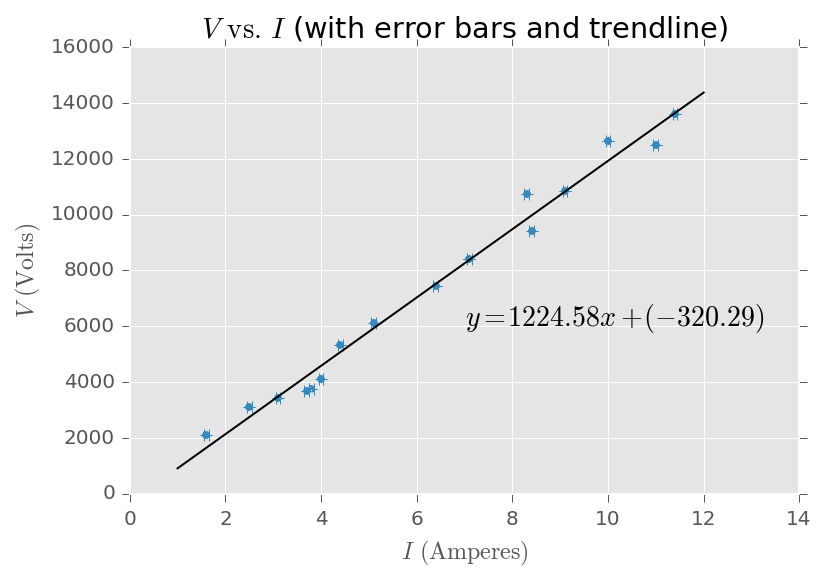

In [15]:
plot = df.plot(x='I',y='V', kind='scatter', 
               title=r'$V$ $\rm vs.$ $I$ (with error bars and trendline)',
              xerr = 0.05, yerr = 0.1);

plot.set_xlabel(r'$I$ $\rm (Amperes)$')
plot.set_ylabel(r'$V$ $\rm (Volts)$')

x1 = 1; y1 = a + b*x1
x2 = 12; y2 = a + b*x2

plt.plot([x1,x2],[y1,y2],'k-')
plt.text(7, 6000, r'$y = %.2f x + (%.2f) $' % (b, a), fontsize=14)

Of course, there is no such experiment in Advanced Lab, but you can modify the code to handle your own data, and extend it if you want to explore more complicated cases, such as when the errors are not all the same.

Have fun!

# Notes
[1] CSV stands for 'comma separated variable', and is a useful text file format for data analysis (unless of course you have many gigabytes of data, in which case you might be better served with a [relational database](https://docs.oracle.com/javase/tutorial/jdbc/overview/database.html), but you don't have to worry about that right now).

If you've collected your data in Excel, you can export your data to a CSV file by clicking:

File > Save As > Comma Separated Values. 